<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
        <img src="https://styleguide.ischool.syr.edu/assets/logos/block/iSchoolBlock-OutlineswithSyracuseUniversity_Orange.png" style="height:75px; margin-left:0px" />
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">Face Mask Detection</h1>
        <div style="width: 100%; text-align: center; display: inline-block;"><i>Author:</i> <strong>B.N. Litin Kumar</strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2016-08-19" pubdate>July 23rd, 2020</time>
        </div>
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: </i>
            <time datetime="2016-08-19" pubdate>July 26th, 2020</time>
        </div>
    </div>
</div>

# Introduction 

Given the ongoing COVID-19 pandemic one of the most important things that would be required to go back to the new normal way of life would be ensuring every person wears a face mask, especially while entering crowded places such as shopping malls, airports, grocery stores etc. This project aims at creating a prototype that can be used to detect whether a person is wearing a face mask in real-time.

### Loading the required pacakges

In [1]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential,load_model
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Data Preprocessing

### Theory

We use a dataset that consist images of different sizes, colors and different backgrounds. So we will convert the image to a greyscale image then resize the image to a 100x100 pixel size

In [4]:
#Reading the data from folder path
data_path = 'data'
categories = os.listdir(data_path)
categories = categories[:-1]
labels=[i for i in range(len(categories))]
#creating a dictionary of the folder with corresponding labels
label_dict = dict(zip(categories,labels))

In [5]:
print(categories)
print(labels)
print(label_dict)

['without mask', 'with mask']
[0, 1]
{'without mask': 0, 'with mask': 1}


In [6]:
#Defining the image size
image_size=100
data=[]
target=[]

In [7]:
#Getting the path for the images
for i in categories:
    folder_path = os.path.join(data_path,i)
    image_names = os.listdir(folder_path)
    
    #Reading the images
    for j in image_names:
        image_path=os.path.join(folder_path,j)
        image = cv2.imread(image_path)
        
        try: 
            #converting the image into gray scale
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

            #resizeing the gray scale into a fixed size image
            resized = cv2.resize(gray,(image_size,image_size))

            #Appedning the image and the label
            data.append(resized)
            target.append(label_dict[i])
            
        except Exception as e:
            print('Exception:',e)

In [8]:
print("This is how the image data looks like:\n",data[1])
print("\nChecking the target list value: \n",target[1])

This is how the image data looks like:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [122 229 220 ... 255 255 255]
 [215 207 209 ... 255 255 255]
 [ 64 151 208 ... 255 255 255]]

Checking the target list value: 
 0


In [9]:
#Normalizing the image data
data = np.array(data)/255.0

#CNN needs a 4 dimensional input arrat
#1. Batch size of the data
#2.&3. Height and width of the data
#4. Depth of the image its 1 for grayscale and 3 for RGB
data=np.reshape(data,(data.shape[0],image_size,image_size,1))
target = np.array(target)

#Converting our target variable into a categorical variable
target = np_utils.to_categorical(target)

# Building a Convolutional Neural Network 

### Theroy 

In this case we will be building a convolutional neural network with one convolutional layer with a kernel size of 3x3. Also, we will be performing Maxpooling to reduce the dimensionality in our convolutional layer and to avoid overfitting

In [9]:
#Convolutional Layer
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:])) #Shape here is (100,100,1)
model.add(Activation('relu'))
#Performing the maxpooling operation
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#Adding another convolutional layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
#Performing the maxpooling operation
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
#Flattening our Convolutional layer
model.add(Flatten())
model.add(Dropout(0.5))#To reduce the overfitting

#Adding dense layers
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#Creating test and train split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [14]:
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7027 - accuracy: 0.5586WARNING:tensorflow:From /Users/litinkumar/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 53s 2s/step - loss: 0.7027 - accuracy: 0.5586 - val_loss: 0.8332 - val_accuracy: 0.4960
Epoch 2/20
31/31 [==============================] - 54s 2s/step - loss: 0.5981 - accuracy: 0.6606 - val_loss: 0.4863 - val_accuracy: 0.7742
Epoch 3/20
31/31 [==============================] - 54s 2s/step - loss: 0.3862 - accuracy: 0.8303 - val_loss: 0.3358 - val_accuracy: 0.8911
Epoch 4/20
31/31 [==============================] - 53s 2s/s

We can see from all the epochs above that we get the lease validation loss and high accuracy at epoch 17, hence we will be using that model in our case 

#### Plotting train and validation losses 

In [14]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

#### Plotting test and train accuracy 

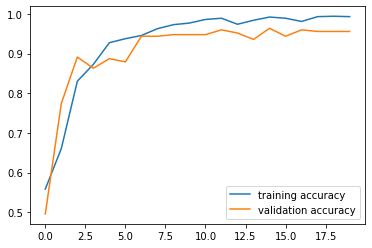

In [17]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

### Checking the accuracy and loss with the test data 

In [13]:
#Checking the accuracy with the test dataset
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 364ms/step - loss: 0.0692 - accuracy: 0.9783
[0.06923317909240723, 0.97826087474823]


## Detecting the face 

In [2]:
#Loading the best model that we obtained in the last step
model = load_model('model-010.model')

In [3]:
#?
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
#Accessing the webcam on device
source=cv2.VideoCapture(0)

In [5]:
#Assigining labels to the output
labels_dict = {0:'No Mask', 1:'Mask'}
color_dict = {0:(0,0,204),1:(0,153,51)}

In [39]:
img = cv2.imread('2.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

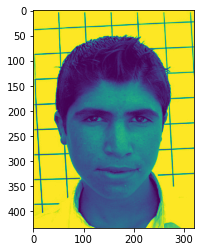

In [40]:
plt.imshow(gray)

In [41]:
for x,y,w,h in faces:
    face_img = gray[y:y+h,x:x+w]
    resized = cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    result=model.predict(reshaped)
    label = np.argmax(result,axis=1)[0]

    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
    #cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(img,labels_dict[label], (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
       

In [36]:
result

array([[0.9987656 , 0.00123448]], dtype=float32)

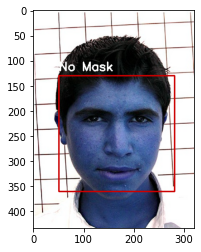

In [42]:
plt.imshow(img)

In [6]:
while(True):
    
    ret,img = source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        face_img = gray[y:y+h,x:x+w]
        resized = cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        
        label = np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        #cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label], (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    
    
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if (key==27):
        break
cv2.destroyAllWindows()
source_release()
        


error: OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
